In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [80]:
df = pd.read_csv("KR_TB_SBWY_STN_HR_CON_20200101_20200531_UTF8.csv")

In [81]:
df

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
0,20200101,1001,서울,00시,4,13
1,20200101,1001,서울,05시,13,1
2,20200101,1001,서울,06시,59,5
3,20200101,1001,서울,07시,32,70
4,20200101,1001,서울,08시,61,113
...,...,...,...,...,...,...
860707,20200531,8015,부산원동,19시,62,24
860708,20200531,8015,부산원동,20시,41,18
860709,20200531,8015,부산원동,21시,56,12
860710,20200531,8015,부산원동,22시,13,-


In [82]:
df.rename(columns={'RUN_DT': '운행일자',
                  'SBWY_STN_PRPR_NO': '전철역관리코드',
                  'SBWY_STN_CD_NM': '역명',
                  'TMWD_DV': '시간대구분',
                  'SBWY_ABRD_PRNB': '전철승차인원수',
                  'SBWY_GOFF_PRNB': '전철하차인원수'},
         inplace=True)

In [83]:
seoul = df[df['역명']=='서울']

In [84]:
seoul.drop(['전철역관리코드','역명'], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 855102
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   운행일자     3110 non-null   int64 
 1   시간대구분    3110 non-null   object
 2   전철승차인원수  3110 non-null   object
 3   전철하차인원수  3110 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


In [86]:
seoul['운행일_시간'] = (seoul['운행일자']).astype(str) + seoul['시간대구분'].str.replace('시','')
seoul['운행일_시간'] = pd.to_datetime(seoul['운행일_시간'], format='%Y%m%d%H')

seoul['전철승차인원수']=pd.to_numeric(seoul['전철승차인원수'].str.strip().str.replace('-','0').str.replace(',',''))
seoul['전철하차인원수']=pd.to_numeric(seoul['전철하차인원수'].str.strip().str.replace('-','0').str.replace(',',''))
seoul['이용객수'] = seoul['전철승차인원수'] + seoul['전철하차인원수']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [87]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 855102
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   운행일자     3110 non-null   int64         
 1   시간대구분    3110 non-null   object        
 2   전철승차인원수  3110 non-null   int64         
 3   전철하차인원수  3110 non-null   int64         
 4   운행일_시간   3110 non-null   datetime64[ns]
 5   이용객수     3110 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 170.1+ KB


In [88]:
seoul

,운행일자,시간대구분,전철승차인원수,전철하차인원수,운행일_시간,이용객수
0,20200101,00시,4,13,2020-01-01 00:00:00,17
1,20200101,05시,13,1,2020-01-01 05:00:00,14
2,20200101,06시,59,5,2020-01-01 06:00:00,64
3,20200101,07시,32,70,2020-01-01 07:00:00,102
4,20200101,08시,61,113,2020-01-01 08:00:00,174
...,...,...,...,...,...,...
855098,20200531,19시,97,371,2020-05-31 19:00:00,468
855099,20200531,20시,67,372,2020-05-31 20:00:00,439
855100,20200531,21시,56,481,2020-05-31 21:00:00,537
855101,20200531,22시,23,373,2020-05-31 22:00:00,396


### 지하철 운행 시간대구분

In [89]:
# 시간대구분
seoul.groupby('시간대구분').count() # 01시=54, 02시=1, 04시=15

,운행일자,전철승차인원수,전철하차인원수,운행일_시간,이용객수
시간대구분,,,,,
00시,152,152,152,152,152
01시,54,54,54,54,54
02시,1,1,1,1,1
04시,15,15,15,15,15
05시,152,152,152,152,152
06시,152,152,152,152,152
07시,152,152,152,152,152
08시,152,152,152,152,152
09시,152,152,152,152,152


In [90]:
len(seoul['운행일_시간'][seoul['시간대구분']=='01시'].dt.day_name())
seoul['운행일_시간'][seoul['시간대구분']=='01시'].dt.day_name()
seoul['운행일_시간'][seoul['시간대구분']=='01시'].dt.month_name() # 1월~4월초까지 존재

5601       January
11298      January
28225      January
33932      January
39630      January
45332      January
51030      January
67971      January
73672      January
79381      January
85080      January
90789      January
107734     January
113451     January
119151     January
124866     January
136178     January
141931     January
153270     January
158960     January
164669     January
170381     January
187311    February
193002    February
198699    February
204387    February
210099    February
232689    February
238394    February
244096    February
249802    February
266746    February
272445    February
278146    February
283852    February
289553    February
329225    February
346076       March
351758       March
357434       March
368782       March
385653       March
391327       March
397015       March
402691       March
408378       March
430894       March
447947       March
464823       March
476180       March
481873       March
487572       March
504527      

In [91]:
# 1~4월 & 5월 데이터 나누기
seoul.iloc[2488] # 20200501 00시
seoul_train = seoul.iloc[:2488]
seoul_pred = seoul.iloc[2488:]

In [92]:
seoul_train.groupby('시간대구분').count()

,운행일자,전철승차인원수,전철하차인원수,운행일_시간,이용객수
시간대구분,,,,,
00시,121,121,121,121,121
01시,54,54,54,54,54
02시,1,1,1,1,1
04시,13,13,13,13,13
05시,121,121,121,121,121
06시,121,121,121,121,121
07시,121,121,121,121,121
08시,121,121,121,121,121
09시,121,121,121,121,121


In [93]:
seoul_pred.groupby('시간대구분').count()

,운행일자,전철승차인원수,전철하차인원수,운행일_시간,이용객수
시간대구분,,,,,
00시,31,31,31,31,31
04시,2,2,2,2,2
05시,31,31,31,31,31
06시,31,31,31,31,31
07시,31,31,31,31,31
08시,31,31,31,31,31
09시,31,31,31,31,31
10시,31,31,31,31,31
11시,31,31,31,31,31


In [94]:
seoul_train[seoul_train['시간대구분']=='02시']

,운행일자,시간대구분,전철승차인원수,전철하차인원수,운행일_시간,이용객수
141932,20200126,02시,0,0,2020-01-26 02:00:00,0


In [95]:
seoul_train[seoul_train['시간대구분']=='01시']

,운행일자,시간대구분,전철승차인원수,전철하차인원수,운행일_시간,이용객수
5601,20200102,01시,0,0,2020-01-02 01:00:00,0
11298,20200103,01시,0,0,2020-01-03 01:00:00,0
28225,20200106,01시,0,0,2020-01-06 01:00:00,0
33932,20200107,01시,0,0,2020-01-07 01:00:00,0
39630,20200108,01시,0,0,2020-01-08 01:00:00,0
45332,20200109,01시,0,0,2020-01-09 01:00:00,0
51030,20200110,01시,0,0,2020-01-10 01:00:00,0
67971,20200113,01시,0,0,2020-01-13 01:00:00,0
73672,20200114,01시,0,0,2020-01-14 01:00:00,0
79381,20200115,01시,0,0,2020-01-15 01:00:00,0


In [101]:
# seoul_train에서 01시 & 02시 승하차 데이터 제외
to_elim = seoul_train[(seoul_train['시간대구분'] == '01시') | (seoul_train['시간대구분'] == '02시')].index
seoul_train = seoul_train.drop(to_elim)
seoul_train.groupby('시간대구분').count()

,운행일자,전철승차인원수,전철하차인원수,운행일_시간,이용객수
시간대구분,,,,,
00시,121,121,121,121,121
04시,13,13,13,13,13
05시,121,121,121,121,121
06시,121,121,121,121,121
07시,121,121,121,121,121
08시,121,121,121,121,121
09시,121,121,121,121,121
10시,121,121,121,121,121
11시,121,121,121,121,121


In [102]:
x = seoul_train['운행일_시간']
y = seoul_train['이용객수']

In [108]:
df_prophet = pd.merge(x,y,how='outer',
                     left_index=True, right_index=True).reset_index(drop=True)

In [109]:
df_prophet = df_prophet.rename(columns={'운행일_시간': 'ds',
                                       '이용객수':'y'})

In [110]:
df_prophet

,ds,y
0,2020-01-01 00:00:00,17
1,2020-01-01 05:00:00,14
2,2020-01-01 06:00:00,64
3,2020-01-01 07:00:00,102
4,2020-01-01 08:00:00,174
...,...,...
2428,2020-04-30 19:00:00,216
2429,2020-04-30 20:00:00,263
2430,2020-04-30 21:00:00,237
2431,2020-04-30 22:00:00,182


In [111]:
import plotly.graph_objs as go
import plotly.offline as py

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [112]:
seoul_pred['시간대구분'].nunique()

21

In [115]:
seoul_pred.shape

(622, 6)

In [113]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [142]:
future = m.make_future_dataframe(periods=744, freq='H')
# future2 = future2[(future2['ds'].dt.hour < 1) &
#                  future2['ds'].dt.hour < 4]
# future2.iloc[2433:]

SyntaxError: invalid syntax (<ipython-input-142-9dabfc0b1565>, line 3)

In [ ]:
forecast = m.predict(future)

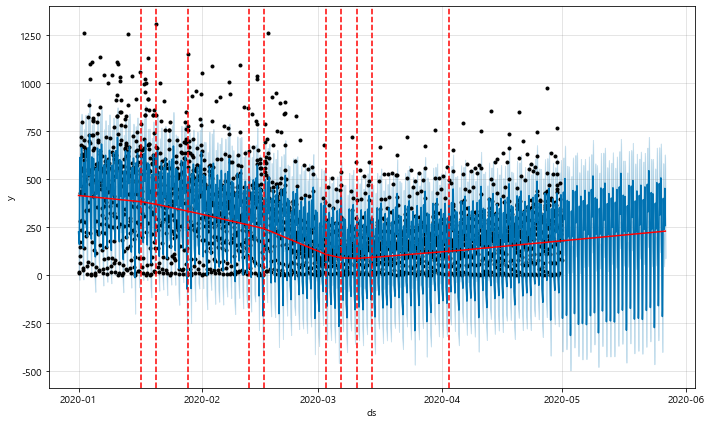

In [118]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

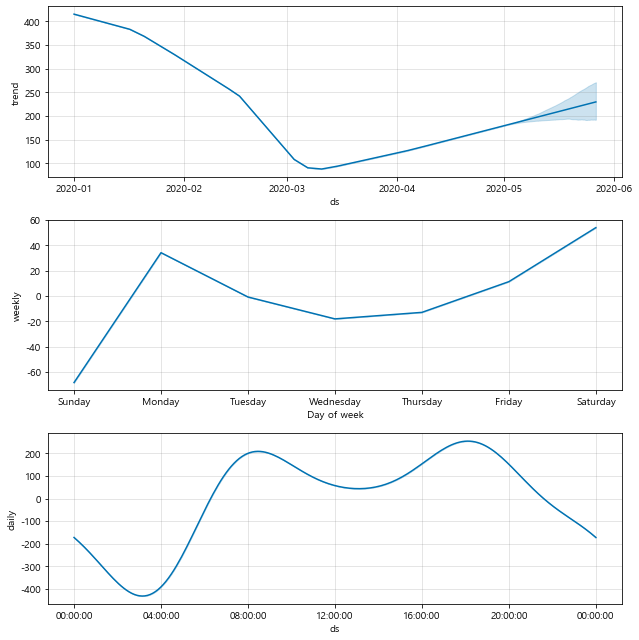

In [119]:
fig2 = m.plot_components(forecast)

In [129]:
frcst = forecast.iloc[2433:]

In [137]:
frcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2433,2020-05-01 00:00:00,179.309433,-150.247465,198.019081,179.309433,179.309433,-160.597741,-160.597741,-160.597741,-172.019836,-172.019836,-172.019836,11.422096,11.422096,11.422096,0.0,0.0,0.0,18.711692
2434,2020-05-01 01:00:00,179.390548,-250.883606,104.782395,179.390548,179.390548,-252.339648,-252.339648,-252.339648,-268.583919,-268.583919,-268.583919,16.244271,16.244271,16.244271,0.0,0.0,0.0,-72.949100
2435,2020-05-01 02:00:00,179.471664,-362.944404,6.548986,179.471664,179.471664,-350.943161,-350.943161,-350.943161,-372.100435,-372.100435,-372.100435,21.157274,21.157274,21.157274,0.0,0.0,0.0,-171.471497
2436,2020-05-01 03:00:00,179.552780,-397.019116,-50.398129,179.552780,179.552780,-403.787741,-403.787741,-403.787741,-429.896260,-429.896260,-429.896260,26.108519,26.108519,26.108519,0.0,0.0,0.0,-224.234961
2437,2020-05-01 04:00:00,179.633896,-352.201501,6.299118,179.633896,179.633896,-359.436548,-359.436548,-359.436548,-390.480151,-390.480151,-390.480151,31.043603,31.043603,31.043603,0.0,0.0,0.0,-179.802652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,2020-05-26 17:00:00,229.357894,222.752596,617.302679,192.080618,270.764934,187.726389,187.726389,187.726389,219.450224,219.450224,219.450224,-31.723835,-31.723835,-31.723835,0.0,0.0,0.0,417.084283
3051,2020-05-26 18:00:00,229.439010,259.207040,629.101347,192.076763,270.907554,223.181316,223.181316,223.181316,253.533746,253.533746,253.533746,-30.352430,-30.352430,-30.352430,0.0,0.0,0.0,452.620326
3052,2020-05-26 19:00:00,229.520126,250.482527,613.572933,192.072908,271.054445,200.585463,200.585463,200.585463,229.306484,229.306484,229.306484,-28.721021,-28.721021,-28.721021,0.0,0.0,0.0,430.105589
3053,2020-05-26 20:00:00,229.601242,170.321278,556.162301,192.069053,271.201337,124.795659,124.795659,124.795659,151.661101,151.661101,151.661101,-26.865442,-26.865442,-26.865442,0.0,0.0,0.0,354.396901


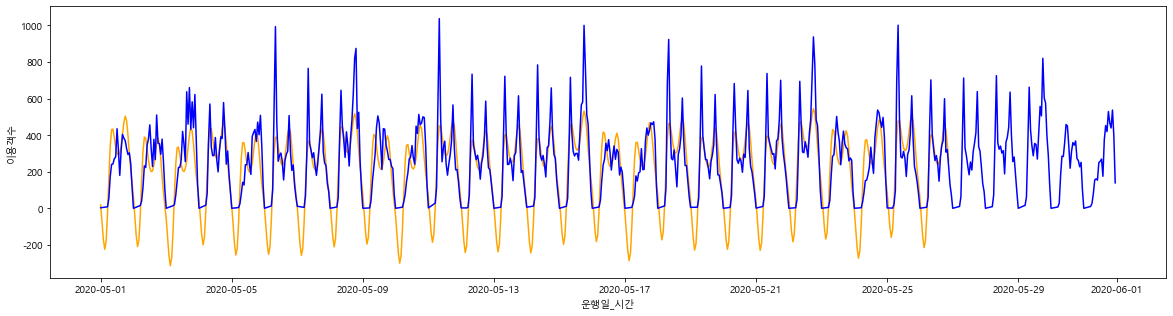

In [136]:
plt.figure(figsize=(20,5))
sns.lineplot(x='ds',y='yhat',data=frcst,color='orange')
sns.lineplot(x='운행일_시간',y='이용객수', data=seoul_pred, color='blue')

In [152]:
future2 = future.copy()
elim_hour = future2[(future2['ds'].dt.hour > 0) & (future2['ds'].dt.hour < 4)].index
future2 = future2.drop(elim_hour)
future2.iloc[2433:]['ds'].dt.hour

2433     0
2437     4
2438     5
2439     6
2440     7
        ..
3172    19
3173    20
3174    21
3175    22
3176    23
Name: ds, Length: 651, dtype: int64

In [153]:
forecast2 = m.predict(future2)

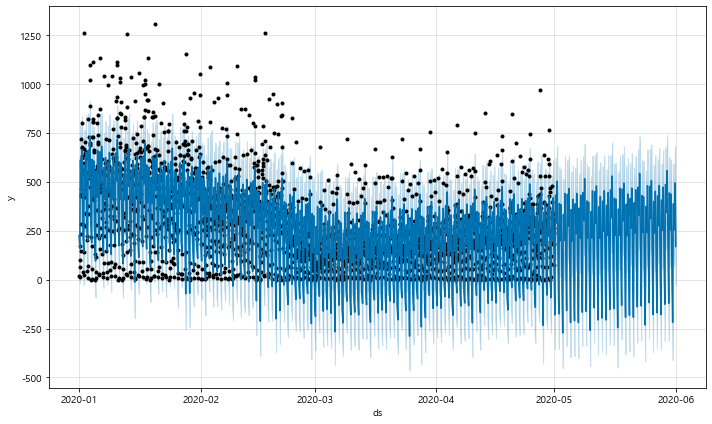

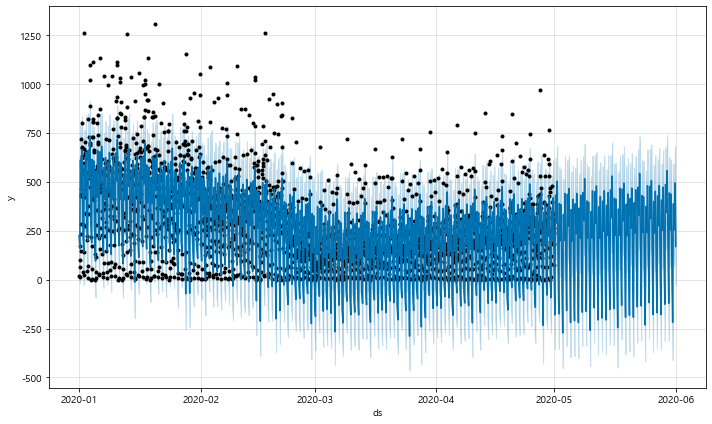

In [154]:
m.plot(forecast2)

In [162]:
frcst2 = forecast2.iloc[2433:]
frcst2_mod = frcst2.copy()
frcst2_mod['yhat'] = frcst2['yhat'].where(frcst2['yhat'] > 0, 0)
frcst2_mod

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2433,2020-05-01 00:00:00,179.309433,-143.454528,183.728237,179.309433,179.309433,-160.597741,-160.597741,-160.597741,-172.019836,-172.019836,-172.019836,11.422096,11.422096,11.422096,0.0,0.0,0.0,18.711692
2434,2020-05-01 04:00:00,179.633896,-356.929252,5.367118,179.633896,179.633896,-359.436548,-359.436548,-359.436548,-390.480151,-390.480151,-390.480151,31.043603,31.043603,31.043603,0.0,0.0,0.0,0.000000
2435,2020-05-01 05:00:00,179.715012,-216.697530,138.630626,179.715012,179.715012,-211.743560,-211.743560,-211.743560,-247.650518,-247.650518,-247.650518,35.906958,35.906958,35.906958,0.0,0.0,0.0,0.000000
2436,2020-05-01 06:00:00,179.796127,-16.421329,334.270393,179.796127,179.796127,-12.467037,-12.467037,-12.467037,-53.109552,-53.109552,-53.109552,40.642515,40.642515,40.642515,0.0,0.0,0.0,167.329091
2437,2020-05-01 07:00:00,179.877243,147.337902,519.061359,179.877243,179.877243,159.844752,159.844752,159.844752,114.650359,114.650359,114.650359,45.194393,45.194393,45.194393,0.0,0.0,0.0,339.721995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,2020-05-31 19:00:00,239.254024,287.732491,666.510248,188.643347,293.102288,238.077107,238.077107,238.077107,229.306484,229.306484,229.306484,8.770623,8.770623,8.770623,0.0,0.0,0.0,477.331131
3080,2020-05-31 20:00:00,239.335140,220.608465,600.344251,188.659080,293.193501,166.155079,166.155079,166.155079,151.661101,151.661101,151.661101,14.493978,14.493978,14.493978,0.0,0.0,0.0,405.490219
3081,2020-05-31 21:00:00,239.416256,117.005004,484.135421,188.674812,293.364587,73.701607,73.701607,73.701607,53.739405,53.739405,53.739405,19.962203,19.962203,19.962203,0.0,0.0,0.0,313.117864
3082,2020-05-31 22:00:00,239.497372,28.962261,442.212503,188.690545,293.535674,-6.402678,-6.402678,-6.402678,-31.523024,-31.523024,-31.523024,25.120346,25.120346,25.120346,0.0,0.0,0.0,233.094694


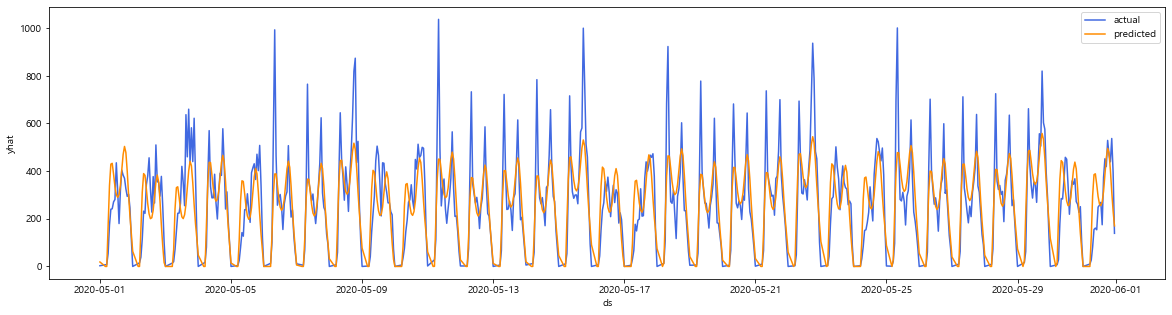

In [178]:
plt.figure(figsize=(20,5))
sns.lineplot(x='운행일_시간',y='이용객수', data=seoul_pred, color='royalblue', label='actual')
sns.lineplot(x='ds',y='yhat',data=frcst2_mod,color='darkorange', label='predicted')

### MODEL 2: + holiday

In [179]:
# 공휴일 : 설날, 석가탄신일 ~ 어린이날
holiday = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.concat([
        pd.Series(pd.date_range('2020-01-24', '2020-01-27', freq='D')),
        pd.Series(pd.date_range('2020-04-30', '2020-05-05', freq='D')),
    ])
    # lower_window = 0,
    # upper_window = 1
})

In [181]:
holiday

,holiday,ds
0,holiday,2020-01-24
1,holiday,2020-01-25
2,holiday,2020-01-26
3,holiday,2020-01-27
0,holiday,2020-04-30
1,holiday,2020-05-01
2,holiday,2020-05-02
3,holiday,2020-05-03
4,holiday,2020-05-04
5,holiday,2020-05-05


In [195]:
m2 = Prophet(
    # trend
#     changepoint_prior_scale=0.5,
#     # seasonality
#     weekly_seasonality=20,
#     yearly_seasonality=10,
#     daily_seasonality=False,
    # holiday
    holidays=holiday)

In [196]:
m2.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [197]:
forecast3 = m2.predict(future2)

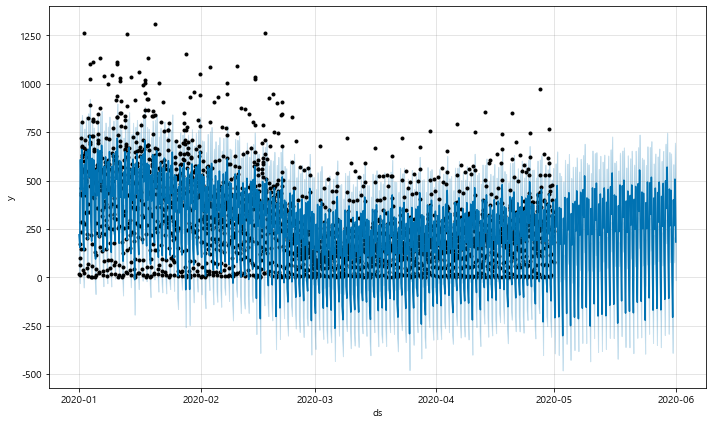

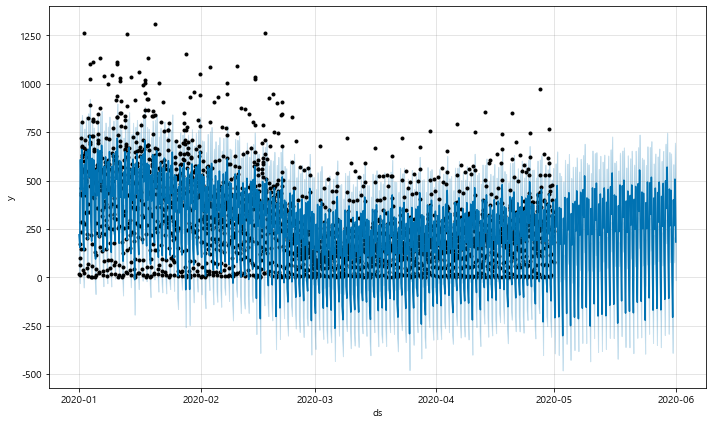

In [198]:
m2.plot(forecast3)

In [199]:
frcst3 = forecast3.iloc[2433:]
frcst3_mod = frcst3.copy()
frcst3_mod['yhat'] = frcst3['yhat'].where(frcst3['yhat'] > 0, 0)
frcst3_mod

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2433,2020-05-01 00:00:00,183.866088,-200.043984,171.239262,183.866088,183.866088,-194.348331,-194.348331,-194.348331,-171.922063,...,-34.524253,-34.524253,-34.524253,12.097985,12.097985,12.097985,0.0,0.0,0.0,0.000000
2434,2020-05-01 04:00:00,184.227867,-392.773797,-15.186329,184.227867,184.227867,-393.241618,-393.241618,-393.241618,-390.464276,...,-34.524253,-34.524253,-34.524253,31.746911,31.746911,31.746911,0.0,0.0,0.0,0.000000
2435,2020-05-01 05:00:00,184.318312,-239.018890,127.682594,184.318312,184.318312,-245.575553,-245.575553,-245.575553,-247.665376,...,-34.524253,-34.524253,-34.524253,36.614076,36.614076,36.614076,0.0,0.0,0.0,0.000000
2436,2020-05-01 06:00:00,184.408757,-34.138811,320.761474,184.408757,184.408757,-46.290229,-46.290229,-46.290229,-53.118556,...,-34.524253,-34.524253,-34.524253,41.352580,41.352580,41.352580,0.0,0.0,0.0,138.118528
2437,2020-05-01 07:00:00,184.499202,140.040435,503.156869,184.499202,184.499202,126.040954,126.040954,126.040954,114.658513,...,-34.524253,-34.524253,-34.524253,45.906695,45.906695,45.906695,0.0,0.0,0.0,310.540156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,2020-05-31 19:00:00,250.704826,309.235426,679.896999,190.609649,301.234975,238.690086,238.690086,238.690086,229.232243,...,0.000000,0.000000,0.000000,9.457843,9.457843,9.457843,0.0,0.0,0.0,489.394912
3080,2020-05-31 20:00:00,250.795271,211.763055,613.706974,190.648554,301.474506,166.800840,166.800840,166.800840,151.612967,...,0.000000,0.000000,0.000000,15.187873,15.187873,15.187873,0.0,0.0,0.0,417.596110
3081,2020-05-31 21:00:00,250.885716,146.602373,503.436270,190.687460,301.714038,74.370556,74.370556,74.370556,53.708944,...,0.000000,0.000000,0.000000,20.661612,20.661612,20.661612,0.0,0.0,0.0,325.256272
3082,2020-05-31 22:00:00,250.976161,61.971394,437.528761,190.726365,301.953569,-5.705439,-5.705439,-5.705439,-31.529265,...,0.000000,0.000000,0.000000,25.823826,25.823826,25.823826,0.0,0.0,0.0,245.270722


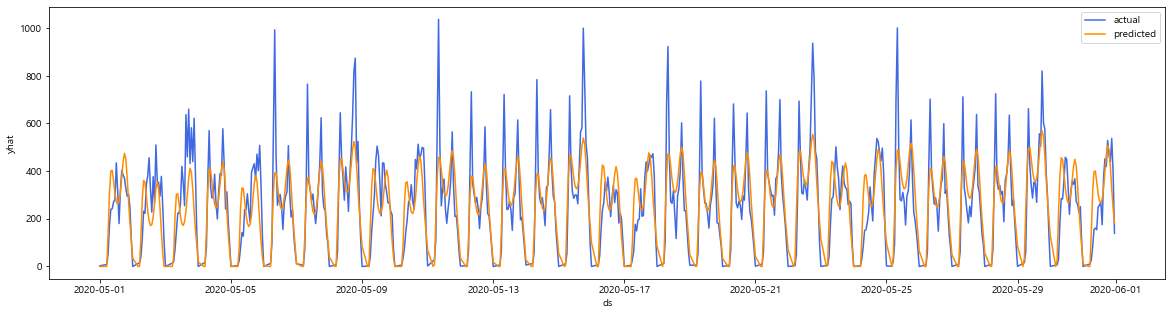

In [200]:
plt.figure(figsize=(20,5))
sns.lineplot(x='운행일_시간',y='이용객수', data=seoul_pred, color='royalblue', label='actual')
sns.lineplot(x='ds',y='yhat',data=frcst3_mod,color='darkorange', label='predicted')

### MODEL 3: + holiday + changepoint_prior_scale + weekly_seasonality

In [226]:
m3 = Prophet(
    # trend
    changepoint_prior_scale=0.5,
#     # seasonality
    weekly_seasonality=20,
    yearly_seasonality=False,
    daily_seasonality='auto',
    # holiday
    holidays=holiday,
    holidays_prior_scale=15.0)

In [227]:
m3.fit(df_prophet)

In [228]:
forecast4 = m3.predict(future2)

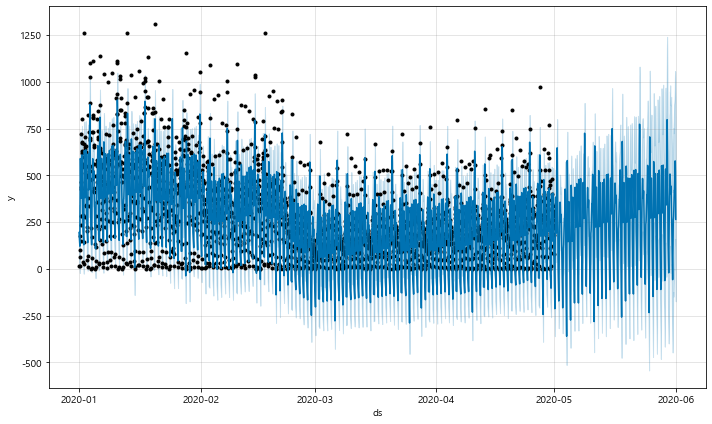

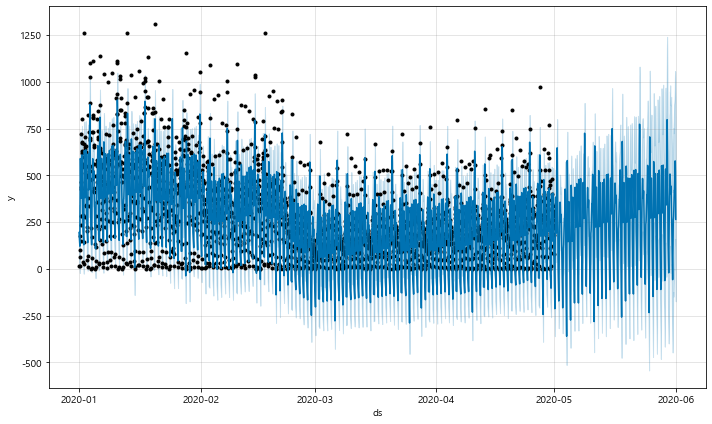

In [229]:
m3.plot(forecast4)

In [230]:
frcst4 = forecast4.iloc[2433:]
frcst4_mod = frcst4.copy()
frcst4_mod['yhat'] = frcst4['yhat'].where(frcst4['yhat'] > 0, 0)
frcst4_mod

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2433,2020-05-01 00:00:00,199.606001,-147.050420,154.109903,199.606001,199.606001,-194.772404,-194.772404,-194.772404,-43.427101,...,-54.104352,-54.104352,-54.104352,-97.240951,-97.240951,-97.240951,0.0,0.0,0.0,4.833597
2434,2020-05-01 04:00:00,200.178680,-359.683937,-55.732829,200.178680,200.178680,-413.159537,-413.159537,-413.159537,-245.533300,...,-54.104352,-54.104352,-54.104352,-113.521885,-113.521885,-113.521885,0.0,0.0,0.0,0.000000
2435,2020-05-01 05:00:00,200.321850,-229.681455,68.244729,200.321850,200.321850,-291.965799,-291.965799,-291.965799,-153.218364,...,-54.104352,-54.104352,-54.104352,-84.643083,-84.643083,-84.643083,0.0,0.0,0.0,0.000000
2436,2020-05-01 06:00:00,200.465020,-43.477064,242.033588,200.465020,200.465020,-106.276832,-106.276832,-106.276832,-17.773523,...,-54.104352,-54.104352,-54.104352,-34.398957,-34.398957,-34.398957,0.0,0.0,0.0,94.188188
2437,2020-05-01 07:00:00,200.608190,121.390059,416.760000,200.608190,200.608190,68.026302,68.026302,68.026302,93.209094,...,-54.104352,-54.104352,-54.104352,28.921560,28.921560,28.921560,0.0,0.0,0.0,268.634492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,2020-05-31 19:00:00,305.408568,122.076274,1057.189379,-98.549013,768.642042,271.791099,271.791099,271.791099,111.699754,...,0.000000,0.000000,0.000000,160.091345,160.091345,160.091345,0.0,0.0,0.0,577.199666
3080,2020-05-31 20:00:00,305.551738,159.717420,1050.536449,-99.675258,770.270210,264.205383,264.205383,264.205383,49.226466,...,0.000000,0.000000,0.000000,214.978917,214.978917,214.978917,0.0,0.0,0.0,569.757121
3081,2020-05-31 21:00:00,305.694907,68.926526,1009.475716,-100.801502,771.869909,207.866365,207.866365,207.866365,-8.229971,...,0.000000,0.000000,0.000000,216.096336,216.096336,216.096336,0.0,0.0,0.0,513.561272
3082,2020-05-31 22:00:00,305.838077,-18.373281,904.791035,-101.927746,773.102100,106.336879,106.336879,106.336879,-33.021736,...,0.000000,0.000000,0.000000,139.358615,139.358615,139.358615,0.0,0.0,0.0,412.174956


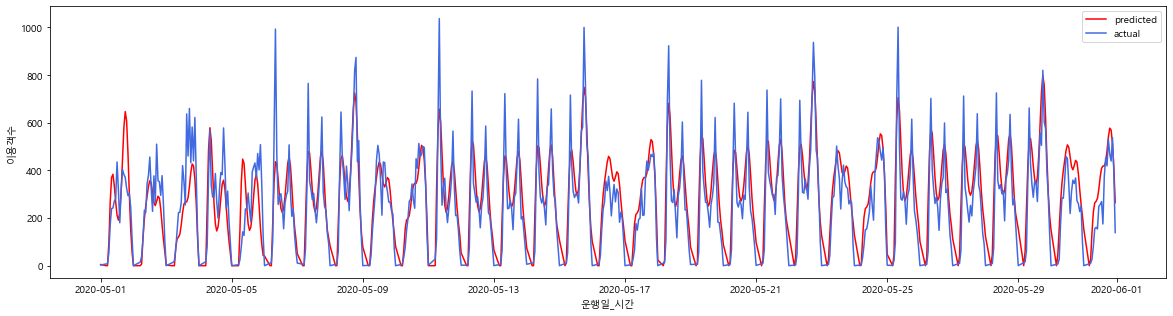

In [251]:
plt.figure(figsize=(20,5))
sns.lineplot(x='ds',y='yhat',data=frcst4_mod,color='red', label='predicted')
sns.lineplot(x='운행일_시간',y='이용객수', data=seoul_pred, color='royalblue', label='actual')